Note: Source is from https://sebastianraschka.com/blog/2020/numpy-intro.html
# Intro to Numpy
## what is numpy?
Numpy stands for Numerical Python. It is widely used as the foundation for many other scientific libraries, such as Scipy, Scikitlearn, and Pandas. 
It provides a convenient way to efficiently work with multi-dimensional array data structures. the numpy array data structure is also called ndarray, which is short for n-dimensional array. 

The main reason that numpy is so efficient for numerical computations is that numpy arrays use contiguous blocks of memory that can be efficiently cached by the CPU.
in contrast, Python lists are arrays of pointers to objects in random locations, which cannot be cached easily and come with more expensive memory lookup. 

## Why is numpy fast and useful?
Let's demonstrate this using doing a dot product in two ways.
The first way is by using a Python list:

In [9]:
 def python_list_dot_prod(a,b):
     z=0
     for i in range(len(a)):
         z+=a[i]*b[i]
     return z

a = list(range(1000))
b = list(range(1000))

%timeit python_list_dot_prod(a,b)

133 μs ± 4.07 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


-----------------------------------------------
Now if we do the same thing using numpy arrays:

In [15]:
import numpy as np


def numpy_dotproduct(a,b):
    return a.dot(b)

a = np.arange(1000)
b = np.arange(1000)

%timeit numpy_dotproduct(a,b)

2.29 μs ± 22.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As we can see, replacing the for-loop with NumPy’s dot function makes the computation of the vector dot product approximately 100 times faster.

## N-Dimensional arrays
NumPy is built around ndarray objects, which are high-performance multi-dimensional array data structures. Intuitively, we can think of a one-dimensional NumPy array as a data structure to represent a vector of elements. Similarly, a two-dimensional array can be seen as a way to represent a matrix or a Python list of lists. Numpy can have up to 32 dimensions.

following are a few examples of NumPy Arrays:
Note: Before you use any numpy feature you need to import the numpy library by using import numpy and then aliasing it as np which is commonly used to make writing code easier.

In [18]:
#importing numpy and aliasing it as np
import numpy as np

#one dimentional array
a = [1,2,3]
np.array(a)

array([1, 2, 3])

In [24]:
# intializing a nested list structure 
lst = [[1,2,3],
       [4,5,6]]
#converting the list into a 2d array
ary2d = np.array(lst)
ary2d

array([[1, 2, 3],
       [4, 5, 6]])

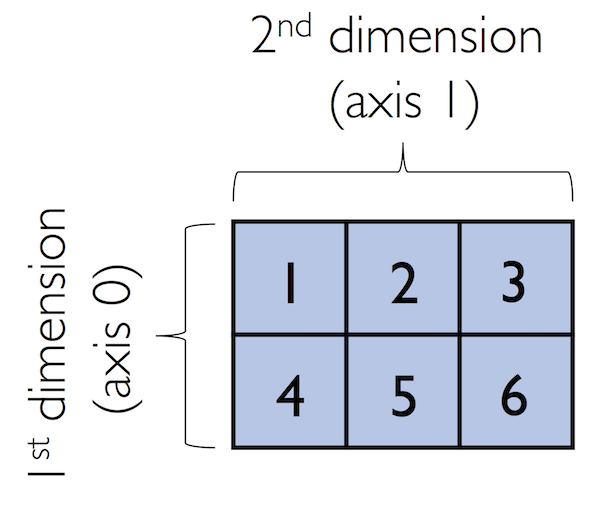

By default, NumPy infers the type of the array upon construction. Since we passed Python integers to the array, the ndarray object ary2d should be of type int64 on a 64-bit machine, which we can confirm by accessing the dtype attribute:

In [29]:
ary2d.dtype

dtype('int32')

If we want to construct a Numpy array of different types, we can pass an argument to the dtype parameter of the array function. eg np.int32 to create 32 bit arrays.
Once an array has been constructed then it can be downcast its type into others by using the astype method:

In [34]:
int32_ary = ary2d.astype(np.int32)
int32_ary

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
float32_ary = ary2d.astype(np.float32)
float32_ary

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [38]:
float32_ary.size

6

int32 and float32 are data types that specify how numbers are stored and processed in computer memory. The term int32 stands for a 32-bit signed integer, which means it can represent whole numbers ranging from -2,147,483,648 to 2,147,483,647. It is commonly used when only whole numbers are needed, such as counting items or indexing arrays. Because it uses a fixed 32 bits (or 4 bytes) of memory, it's efficient in terms of storage, especially when working with large datasets that only require integers.

On the other hand, float32 refers to a 32-bit floating-point number, which is used to represent real numbers that include decimal points. It follows the IEEE 754 standard and can represent a wide range of values with approximately 7 digits of precision. This data type is useful for storing continuous values like measurements, probabilities, or financial figures. While it also uses 4 bytes of memory, float32 trades off some precision for efficiency and is commonly used in data science and machine learning where large numerical computations are performed.

To return the number of elements in an array, we can use the size attribute. 
And the number of dimensions of our array (Intuitively, you may think of dimensions as the rank of a tensor) can be obtained via the ndim attribute:

Note: A tensor is a generalization of scalars, vectors, and matrices to higher dimensions. It is essentially a multidimensional array used to represent data in mathematical ancomputational models.   .

For example:
- A scalar (single number) is a 0-dimensional tensor.
- A vector (1D array) is a 1-dimensional tensor.
- A matrix (2D array) is a 2-dimensional tensor.
- A 3D tensor might represent a stack of matrices (like a color image with RGB channels), and tensors can go up to many dimensions as needed.

In [56]:
print(ary2d)
ary2d.ndim

[[1 2 3]
 [4 5 6]]


2

The shape is always a tuple; in the code example above, the two-dimensional ary object has two rows and three columns, (2, 3), if we think of it as a matrix representation.

Conversely, the shape (an object of type tuple) of a one-dimensional array only contains a single value:

In [58]:
ary2d.shape

(2, 3)

In [60]:
np.array([1., 2., 3.]).shape

(3,)

# Numpy Array Construction and Indexing


## Array Construction Routines

In [67]:
np.ones((3,4), dtype = np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [71]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

We can use these functions to create arrays with arbitrary values, e.g., we can create an array containing the values 99 as follows:

In [74]:
np.zeros((3, 3)) + 99

array([[99., 99., 99.],
       [99., 99., 99.],
       [99., 99., 99.]])

Creating arrays of ones or zeros can also be useful as placeholder arrays, in cases when we do not want to use the initial values for computations but want to fill them with other values right away. If we do not need the initial values, there os also a numpy.empty which creates an array with nonsensical values from memory. What zeroes and ones do is create an array via np.empty and then populate it with zeros or ones, respectively.

We can also create identity matrices and diagonal matricaes as ndarrays that can be useful in the context of linear algebra.


In [79]:
np.empty((5,5))

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306,
        1.69120145e-306, 7.56587584e-307],
       [1.37961302e-306, 1.05699242e-307, 8.01097889e-307,
        1.78020169e-306, 7.56601165e-307],
       [1.02359984e-306, 1.42417221e-306, 7.56593017e-307,
        1.24610587e-306, 6.23059726e-307],
       [1.11261027e-306, 1.69118108e-306, 1.78021119e-306,
        8.34445562e-308, 9.45699680e-308],
       [1.11261774e-306, 1.29060871e-306, 8.34424766e-308,
        2.12203497e-312, 1.71700049e+222]])

In [81]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [87]:
np.diag((1,3,5,7))

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 7]])

Two very useful functions for creating sequences of numbers within a specified range, namely, arange and linspace. 
NumPy’s arange function follows the same syntax as Python’s range objects: If two arguments are provided, the first argument represents the start value and the second argument defines the stop value of a half-open interval:

In [129]:
np.arange(4, 10)

array([4, 5, 6, 7, 8, 9])

In [131]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [135]:
np.arange(1., 11., 0.1)
#(start, end, step)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9])

The linspace function is especially useful if we want to create a particular number of evenly spaced values in a specified half-open interval:

In [140]:
np.linspace(6., 15., num=5)

array([ 6.  ,  8.25, 10.5 , 12.75, 15.  ])

In [142]:
np.linspace(6., 15., num=10)

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.])

## Array Indexing

Simple NumPy indexing and slicing works similar to Python lists, which we will demonstrate in the following code snippet, where we retrieve the first element of a one-dimensional array:

In [148]:
ary = np.array([1, 2, 3])
ary[0]

1

In [154]:
ary[0:3]

array([1, 2, 3])

If we work with arrays that have more than one dimension or axis, we separate our indexing or slicing operations by commas as shown in the series of examples below:

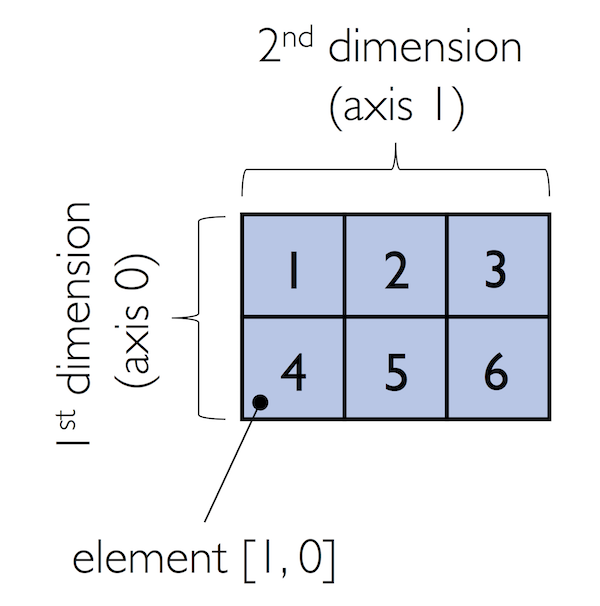

In [158]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

ary[0, -2] # first row, second from last element

2

In [160]:
ary[-1, -1] # lower right

6

In [162]:
ary[1, 1] # first row, second column

5

In [165]:
ary[:, 0] # entire first column

array([1, 4])

In [167]:
ary[:, :2] # first two columns

array([[1, 2],
       [4, 5]])

# Numpy Array Math

While we typically use for loops if we want to perform arithmetic operations on sequence like obe=jects, NumPy provides vectorized wrappers for performing element wose ooperations implicitly voa so called ufuncs (universal functions).

ufuncs are implemented in c code and are very fast and efficient compated to vanilla python.

In [6]:
lst= [[1,2,3],
      [4,5,6]]
for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] +=1
lst

[[2, 3, 4], [5, 6, 7]]

In [7]:
lst= [[1,2,3],
      [4,5,6]]
[[cell + 1 for cell in row]for row in lst]

[[2, 3, 4], [5, 6, 7]]

In [8]:
ary = np.array([[1,2,3],
      [4,5,6]])
ary = np.add(ary,1)
ary

array([[2, 3, 4],
       [5, 6, 7]])

In [10]:
ary-1

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
np.power(ary,2)

array([[ 4,  9, 16],
       [25, 36, 49]], dtype=int32)

In [12]:
ary**2

array([[ 4,  9, 16],
       [25, 36, 49]])

In [13]:
np.sqrt(ary)

array([[1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131]])

In [15]:
ary = np.array([[1,2,3],
                [4,5,6]])
np.add.reduce(ary,axis = 0)

array([5, 7, 9])

In [17]:
np.add.reduce(ary,axis = 1)

array([ 6, 15])

In [20]:
print(ary.sum(axis = 0))
print(ary.sum(axis = 1))
print(ary.sum())

[5 7 9]
[ 6 15]
21


Other useful unary ufuncs are:

- np.mean (computes arithmetic mean or average)
- np.std (computes the standard deviation)
- np.var (computes variance)
- np.sort (sorts an array)
- np.argsort (returns indices that would sort an array)
- np.min (returns the minimum value of an array)
- np.max (returns the maximum value of an array)
- np.argmin (returns the index of the minimum value)
- np.argmax (returns the index of the maximum value)
- np.array_equal (checks if two arrays have the same shape and elements)

# NumPy Broadcasting

Broadcasting allows us to perform vectorized operations between two arrays even if their dimensions do not match by creating implicit multidimensional grids. 


In [21]:
np.array([1,2,3])+1

array([2, 3, 4])

In [22]:
ary2 = np.array([[4, 5, 6], 
                 [7, 8, 9]])

ary2 + ary

array([[ 5,  7,  9],
       [11, 13, 15]])

![alt text](broadcasting-2.png)

#  NumPy Advanced Indexing

## Advanced Indexing – Memory Views and Copies:

It is important to note that basic integer-based indexing and slicing create so-called views of NumPy arrays in memory. Working with views can be highly desirable since it avoids making unnecessary copies of arrays to save memory resources. 

In [28]:
ary = np.array([[1,2,3],
                [4,5,6]])
first_row = ary[0]
first_row

array([1, 2, 3])

In [29]:
first_row +=99
first_row

array([100, 101, 102])

In [30]:
ary

array([[100, 101, 102],
       [  4,   5,   6]])

As expected, first_row was modified, now containing the original values in the first row incremented by 99.

however, that the original array was modified as well:

In [44]:
ary = np.array([[1,2,3],[4,5,6],[7,8,9]])
first_row = ary[0:2,0:2] # ary [row:row, col:col]
first_row += 99
ary

array([[100, 101,   3],
       [103, 104,   6],
       [  7,   8,   9]])

If we are working with NumPy arrays, it is always important to be aware that slicing creates views – sometimes it is desirable since it can speed up our code by avoiding to create unnecessary copies in memory. However, in certain scenarios we want force a copy of an array

In [ ]:
ary = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])

first_row = ary[0].copy()
first_row += 99
print(first_row)
print(ary)

[100 101 102]
[[1 2 3]
 [4 5 6]]


# Fancy Indexing 

In addition to basic single-integer indexing and slicing operations, NumPy supports advanced indexing routines called fancy indexing. Via fancy indexing, we can use tuple or list objects of non-contiguous integer indices to return desired array elements. Since fancy indexing can be performed with non-contiguous sequences, it cannot return a view – a contiguous slice from memory. Thus, fancy indexing always returns a copy of an array – it is important to keep that in mind. 

In [72]:
ary = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])
ary[:2,[0,2]] # first and last column

array([[1, 3],
       [4, 6]])

In [73]:
ary_copy = ary[:2,[0,2]] # first and last column
ary_copy +=99
ary_copy

array([[100, 102],
       [103, 105]])

In [ ]:
print("Initial Array:\n",ary)
ary_index = ary[:,:2]
print("indexed Array:\n",ary_index)
ary_index += 99
print("Initial Array:\n",ary)

Initial Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
indexed Array:
 [[1 2]
 [4 5]
 [7 8]]
Initial Array:
 [[100 101   3]
 [103 104   6]
 [106 107   9]]


# Boolean Masks
We can also use Boolean masks for indexing – that is, arrays of True and False values.

In [79]:
ary = np.array([[1, 5, 3],
                [4, 2, 6]])
greater_mask = ary>3
print(greater_mask)
print(ary[greater_mask])

[[False  True False]
 [ True False  True]]
[5 4 6]


In [80]:
greater_mask = (ary > 3) & (ary % 2 == 0)
print(greater_mask)
print(ary[greater_mask])

[[False False False]
 [ True False  True]]
[4 6]


# Random Number Generator

In Machine learning and deep learning, we often have to generate arrays of random numbers- for example, the initial values of out model parameters before optimization.
NumPy has a random subpackage to create random numbers and samples from a variety of distributions conveniently.

In [82]:
np.random.seed(123)
np.random.rand(3)

array([0.69646919, 0.28613933, 0.22685145])

In this we first seended NumPys random number generator.Thenm we drew three ransom samples from a uniform distribution via random.rand in the half-open intervl [0,1).

for example, if we execute a Python script – it should be sufficient to seed the random number generator only once at the beginning to enforce reproducible outcomes between different runs. However, it is often useful to create separate RandomState objects for various parts of our code, so that we can test methods of functions reliably in unit tests. 

In [83]:
rng2 = np.random.RandomState(seed=531)
rng2.rand(3)

array([0.68980796, 0.35494577, 0.94994208])

In [84]:
rng2 = np.random.default_rng(seed=123)
rng2.random(3)

array([0.68235186, 0.05382102, 0.22035987])

# Reshaping Numpy arrays

We often run into situations where existing arrays do not have the right shape to perform certain computations. The size of numpy arrays is fixed. This does not mean that we have to create new arrays and copy values from the old array to the new one if we want arrays of different shapes- the size is fixed but the shape is not.


In [85]:
ary1d = np.array([1,2,3,4,5,6])
ary2d_view = ary1d.reshape(2,3)
ary2d_view

array([[1, 2, 3],
       [4, 5, 6]])

In [86]:
#The True value returned from np.may_share_memory indicates that the reshape operation returns a memory view
np.may_share_memory(ary2d_view, ary1d)

True

While we need to specify the desired elements along each axis, we need to make sure that the reshaped array has the same number of elements as the original one. However, we do not need to specify the number elements in each axis; NumPy is smart enough to figure out how many elements to put along an axis if only one axis is unspecified 

In [ ]:
ary1d.reshape(-1, 2) # .reshape(rows, columns)

array([[1, 2],
       [3, 4],
       [5, 6]])

We can also use reshape to flatten an array

In [88]:
ary = np.array([[[1,2,3],
                 [4,5,6]]])
ary.reshape(-1)

array([1, 2, 3, 4, 5, 6])

There also exists other methods to flatten arrays like:
- flatten: Which creates a copy of the array.
- ravel : Which creates a memory view like reshape.

In [89]:
ary.flatten()

array([1, 2, 3, 4, 5, 6])

In [93]:
ary.ravel()

array([1, 2, 3, 4, 5, 6])

In [108]:
ary.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [107]:
ary_2d = ary.reshape(2, 3)
print(ary_2d)
ary_2d.ravel().reshape(-1, 1)

[[1 2 3]
 [4 5 6]]


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

# NumPy Comparison Operators and Masks
Boolean masks are bool-type arrays (storing True and False values) that have the same shape as a certain target array. For example, consider the following 4-element array below. Using comparison operators (such as <, >, <=, and >=), we can create a Boolean mask of that array which consists of True and False elements depending on whether a condition is met in the target array


In [8]:
ary = np.array([1, 2, 3, 4, 5])
mask = ary > 2
mask

array([False, False,  True,  True,  True])

In [10]:
ary[mask]

array([3, 4, 5])

Beyond the selection of elements from an array, Boolean masks can also come in handy when we want to count how many elements in an array meet a certain condition:

In [12]:
mask.sum()

3

A useful function to assign values to specific elements in an array is the np.where function.

In [16]:
ary = np.array([1,2,3,4,5])
np.where(ary>2,1,0)

array([0, 0, 1, 1, 1])

In [18]:
ary = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])
np.where(ary>5, True,False)

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [20]:
ary = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])
mask = ary>2
ary[mask] = 1
ary[~mask] = 0
ary

array([[0, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

- A: `&` or `np.bitwise_and`  
- Or: `|` or `np.bitwise_or`  
- Xor: `^` or `np.bitwise_xor`  
- Not: `~` or `np.bitwise_not`


In [34]:
ary = np.array([1,2,3,4,5])
ary[(ary>3)|(ary<2)]

array([1, 4, 5])

In [36]:
ary[~((ary > 3) | (ary < 2))]

array([2, 3])

# Linear Algebra with NumPy

We can think of one dimensional NumPy arrays as data structures that represent row vectors

In [42]:
row_vector = np.array([1,2,3])
row_vector

array([1, 2, 3])

In [50]:
column_vector = np.array([1,2,3]).reshape(-1,1)
column_vector

array([[1],
       [2],
       [3]])

In [52]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [54]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

All three approaches listed above, using reshape(-1, 1), np.newaxis, or None yield the same results – all three approaches create views not copies of the row_vector array.


We can think of a column vector as a matrix consisting only of one column. To perform matrix multiplication between matrices, we learned that number of columns of the left matrix must match the number of rows of the matrix to the right. In NumPy, we can perform matrix multiplication via the matmul function:

In [62]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
np.matmul(matrix, column_vector)

array([[14],
       [32]])

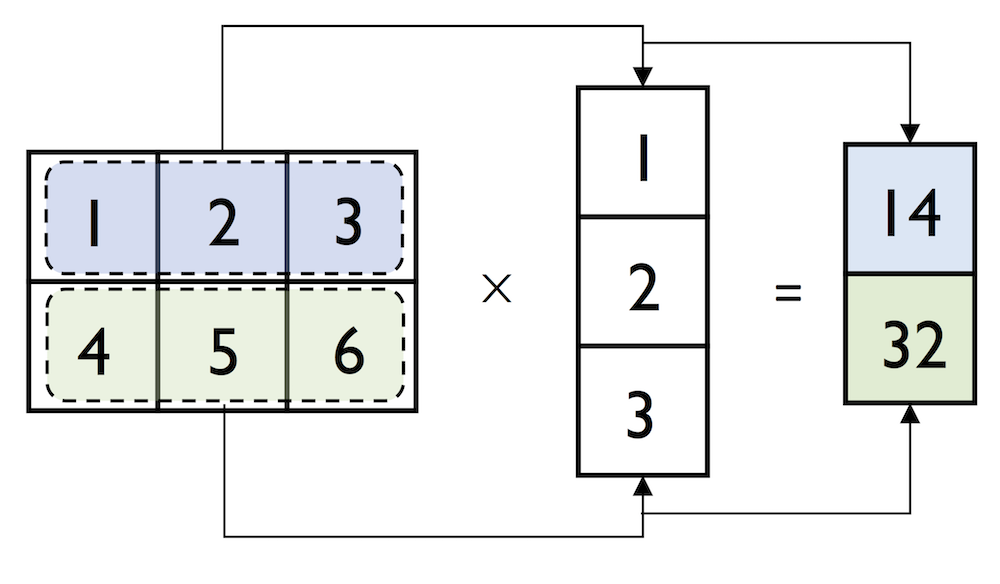


However, if we are working with matrices and vectors, NumPy can be quite forgiving if the dimensions of matrices and one-dimensional arrays do not match exactly – thanks to broadcasting. The following example yields the same result as the matrix-column vector multiplication, except that it returns a one-dimensional array instead of a two-dimensional one:

In [67]:
np.matmul(matrix, row_vector)

array([14, 32])

NumPy has a special dot function that behaves similar to matmul on pairs of one- or two-dimensional arrays – its underlying implementation is different though

In [70]:
np.dot(matrix, row_vector)

array([14, 32])

In [74]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

In [72]:
matrix @ row_vector

array([14, 32])

Similar to the examples above we can use matmul or dot to multiply two matrices (here: two-dimensional arrays). In this context, NumPy arrays have a handy transpose method to transpose matrices if necessary:

In [80]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])

matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [82]:
np.dot(matrix, matrix.transpose())

array([[14, 32],
       [32, 77]])

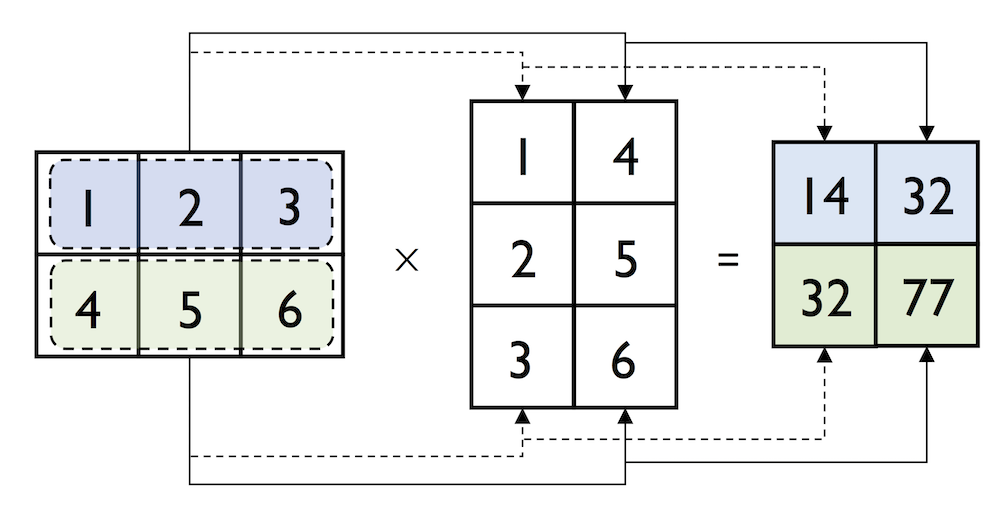

While transpose can be annoyingly verbose for implementing linear algebra operations NumPy has a shorthand for that: T:

In [87]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [89]:
np.dot(matrix, matrix.T)

array([[14, 32],
       [32, 77]])

# Extra Activity

Now for a little fun activity that I challenged myself to do:

Goal: To get a list of all the top n prime numbers using Python and try and do it as efficiently as possible i.e., take the least amount of time as compared to all the other options.

In [96]:
# First way I can think of is to loop a list
a = []
n=100
count = 0 

for i in range(0,n):
    check = 0
    for j in range(2,i):
        if (i%j) == 0:
            check = 1
        else:
            continue
    if check == 0:
        a.append(i)
print(a)

[0, 1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


This looks too complicated and probably can be optimized a lot haha. this also isnt doing what i intended it to do. I wanted the first 100 primes and not the primes out of the first 100.

In [114]:
# Improvement 1

a = []
n = 100
count = 0
i = 1 
while(count != 100):
    check = 0
    for j in range(2,i):
        if (i%j) == 0:
            check = 1
        else: 
            continue
    if check ==0:
        a.append(i)
        count+=1      
    i+=1

print(a)

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523]


Now after some reading and stuff( i totally didnt chat gpt this), I found that i dont really need to go up till the prime number and just till the sqrt of i).

Also the continue was redundant, couldve just done a break statement. 

In [123]:
import math
n = 100
a = []
count = 0
i = 2  

while count < n:
    check = True
    for j in range(2, int(math.sqrt(i)) + 1):
        if i % j == 0:
            check = False
            break
    if check:
        a.append(i)
        count += 1
    i += 1

print(a)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


There are probably more efficient ways to do this, like using the sieve of Eratosthenes or a segmented sieve, but i guess this is good enough for me right now.